In [20]:
import pandas as pd
import seaborn as sns
import numpy as np

In [61]:
df = pd.read_csv("submissions.csv")
#bools = ["coding", "game", "instrument", "touch"]
#df[bools] = df[bools].astype(bool)
df = df.drop("estimate", axis=1) # unused in the dataset
df["windows"] = df["user_agent"].str.contains("Windows", case=False, na=False).astype(int)
df["macos"] = df["user_agent"].str.contains("Macintosh|Mac OS", case=False, na=False).astype(int)
df["linux"] = df["user_agent"].str.contains("Linux", case=False, na=False).astype(int)
# df = df.drop(df["wpm"].idxmax()) # remove maximum outlier (me)
df

,accuracy,class,coding,created,game,id,instrument,raw_wpm,session_token,time_ms,touch,updated,user_agent,wpm,windows,macos,linux
0,97.3,2sth,1,2025-12-02 10:46:16.013Z,1,k0qbwwwrf0kjnm0,0,82.4,a507cf05-6f79-4a23-9aef-c2b5cf0b7b56,19949,0,2025-12-02 10:46:16.013Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,80.6,1,0,0
1,100.0,2sth,1,2025-12-02 10:46:20.322Z,0,inbhsrc88p0u8e2,1,177.7,bf93b282-7c5f-4e76-b5aa-e90627813ebb,9788,1,2025-12-02 10:46:20.322Z,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,177.7,0,1,0
2,99.0,2sth,0,2025-12-02 10:49:22.036Z,1,la8jak35zilakzd,1,78.6,b4a5253d-1757-4fce-9507-1006cf2709ea,19986,0,2025-12-02 10:49:22.036Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,78.0,1,0,0
3,99.0,2stg,1,2025-12-02 11:33:28.101Z,1,ihz2aoawgxu51v7,1,43.4,94b8e7e3-7705-49a6-b3d6-2f517bb2545f,36978,0,2025-12-02 11:33:28.101Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,43.1,1,0,0
4,98.2,2sth,1,2025-12-02 11:33:58.010Z,1,p8zlyuj5gxtabe6,0,91.5,30d85efb-7e2e-4e77-92b5-fd7906481603,18224,1,2025-12-02 11:33:58.010Z,Mozilla/5.0 (X11; Linux x86_64; rv:144.0) Geck...,90.2,0,0,1
5,99.0,2stg,1,2025-12-02 11:38:48.623Z,1,pdl2frap4c5r8wb,0,105.7,b663bf58-197f-49ef-8bf8-78efc38eceda,14519,1,2025-12-02 11:38:48.623Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,104.9,1,0,0
6,95.2,3stf,1,2025-12-02 11:49:37.840Z,1,4cse17qp2phsn6x,1,35.5,469d2fba-e33c-42eb-a36c-fc300e793262,42880,1,2025-12-02 11:49:37.840Z,Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...,34.1,0,1,0
7,100.0,2itka,1,2025-12-04 20:39:29.164Z,1,d5ch9d3fx7vdhwm,0,55.5,cab96766-0df5-4aac-974b-2f71b65767c6,30033,0,2025-12-04 20:39:29.164Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,55.5,1,0,0
8,98.0,3bya,1,2025-12-05 07:18:42.030Z,0,4u8sdon6t3sc96e,0,67.2,6452f0f7-c29e-403f-beb1-79d0e51897b0,22318,0,2025-12-05 07:18:42.030Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,66.1,1,0,0
9,83.3,3stb,1,2025-12-05 07:19:09.964Z,1,z5n7ffc10b08so1,0,105.0,77022cc5-d2c1-4463-86c0-27aa0066b003,13134,0,2025-12-05 07:19:09.964Z,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,90.4,0,1,0


In [62]:
df.sort_values("wpm", ascending=False)

,accuracy,class,coding,created,game,id,instrument,raw_wpm,session_token,time_ms,touch,updated,user_agent,wpm,windows,macos,linux
1,100.0,2sth,1,2025-12-02 10:46:20.322Z,0,inbhsrc88p0u8e2,1,177.7,bf93b282-7c5f-4e76-b5aa-e90627813ebb,9788,1,2025-12-02 10:46:20.322Z,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,177.7,0,1,0
15,87.5,3stg,1,2025-12-05 07:20:51.102Z,1,4btnuqt6egfz6vh,1,127.9,78dbb642-6320-434f-911e-bc5496fbc309,11724,1,2025-12-05 07:20:51.102Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,114.6,1,0,0
17,100.0,2ikta,1,2025-12-05 08:05:18.922Z,1,2veeoqw3380s5mf,1,111.3,99635f85-357e-4fcb-a1ad-52aebfca41ce,14553,1,2025-12-05 08:05:18.922Z,Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build...,111.3,0,0,1
5,99.0,2stg,1,2025-12-02 11:38:48.623Z,1,pdl2frap4c5r8wb,0,105.7,b663bf58-197f-49ef-8bf8-78efc38eceda,14519,1,2025-12-02 11:38:48.623Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,104.9,1,0,0
9,83.3,3stb,1,2025-12-05 07:19:09.964Z,1,z5n7ffc10b08so1,0,105.0,77022cc5-d2c1-4463-86c0-27aa0066b003,13134,0,2025-12-05 07:19:09.964Z,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,90.4,0,1,0
4,98.2,2sth,1,2025-12-02 11:33:58.010Z,1,p8zlyuj5gxtabe6,0,91.5,30d85efb-7e2e-4e77-92b5-fd7906481603,18224,1,2025-12-02 11:33:58.010Z,Mozilla/5.0 (X11; Linux x86_64; rv:144.0) Geck...,90.2,0,0,1
0,97.3,2sth,1,2025-12-02 10:46:16.013Z,1,k0qbwwwrf0kjnm0,0,82.4,a507cf05-6f79-4a23-9aef-c2b5cf0b7b56,19949,0,2025-12-02 10:46:16.013Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,80.6,1,0,0
2,99.0,2sth,0,2025-12-02 10:49:22.036Z,1,la8jak35zilakzd,1,78.6,b4a5253d-1757-4fce-9507-1006cf2709ea,19986,0,2025-12-02 10:49:22.036Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,78.0,1,0,0
18,100.0,2itka,1,2025-12-05 08:19:32.702Z,1,m7m7e4adlpm1t1b,1,71.1,fbf6518e-4518-4c28-a555-ffe84c53eea7,20748,1,2025-12-05 08:19:32.702Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,71.1,1,0,0
26,100.0,1stg,0,2025-12-11 07:36:57.311Z,1,9b7ec3jl2efe6gg,0,70.0,1a93209c-952f-46de-9004-79e81d9aebb9,20042,1,2025-12-11 07:36:57.311Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,70.0,1,0,0


In [63]:
df["class"].value_counts()

class
1stg     6
2sth     4
2stg     3
2itka    3
3stb     3
3stg     2
2sta     2
2sth     1
3stf     1
3bya     1
2std     1
2ikta    1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

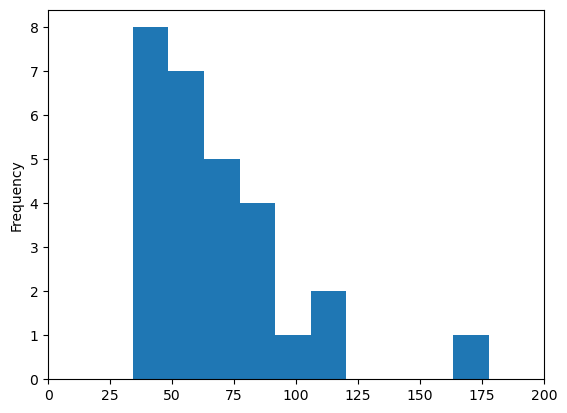

In [64]:
ax = df["wpm"].plot(kind="hist")
ax.set_xlim(left=0, right=200)
ax

<Axes: ylabel='Touch?'>

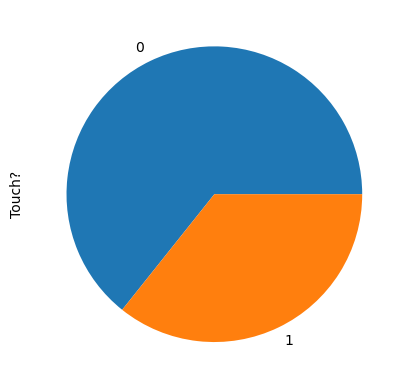

In [65]:
df["touch"].value_counts().plot(kind="pie", ylabel="Touch?")

<Axes: ylabel='Instrument?'>

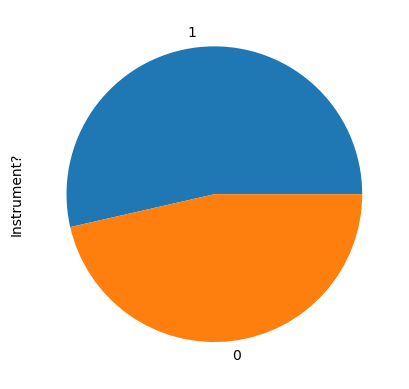

In [66]:
df["instrument"].value_counts().plot(kind="pie", ylabel="Instrument?")

<Axes: ylabel='Spill?'>

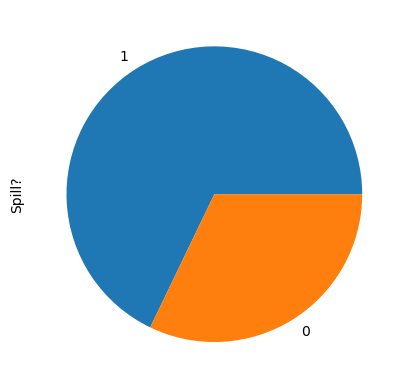

In [67]:
df["game"].value_counts().plot(kind="pie", ylabel="Spill?")

<Axes: ylabel='Programmering?'>

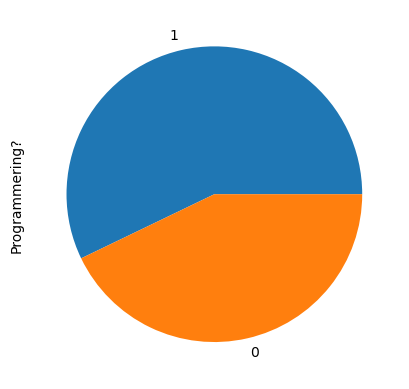

In [68]:
df["coding"].value_counts().plot(kind="pie", ylabel="Programmering?")

<Axes: title={'center': 'Correlation heatmap'}>

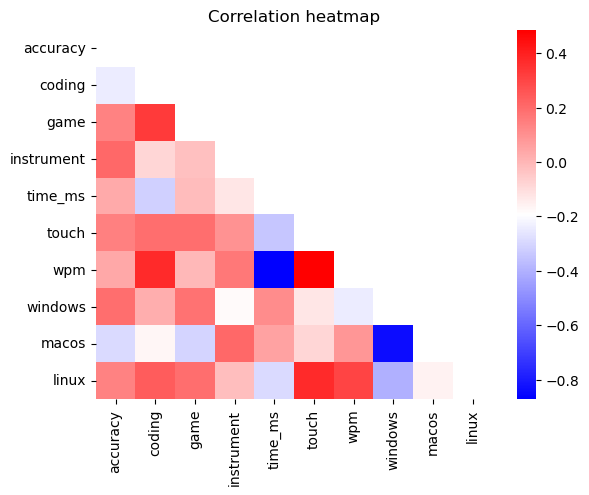

In [69]:
df_n = df.select_dtypes(include=["number"]).drop("raw_wpm", axis=1)
corr = df_n.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, cmap="bwr")
ax.set_title("Correlation heatmap")
ax

<Axes: xlabel='touch', ylabel='wpm'>

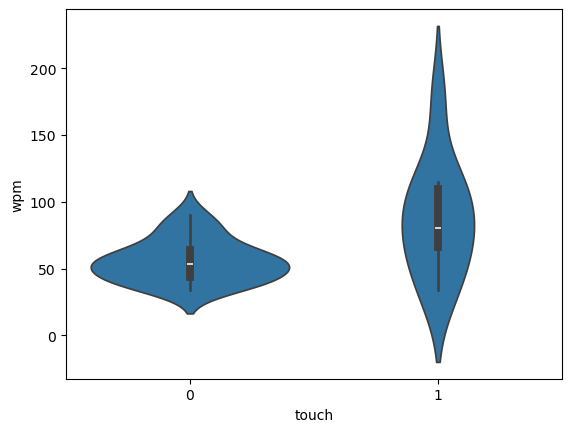

In [70]:
sns.violinplot(x="touch", y="wpm", data=df)

<Axes: xlabel='instrument', ylabel='wpm'>

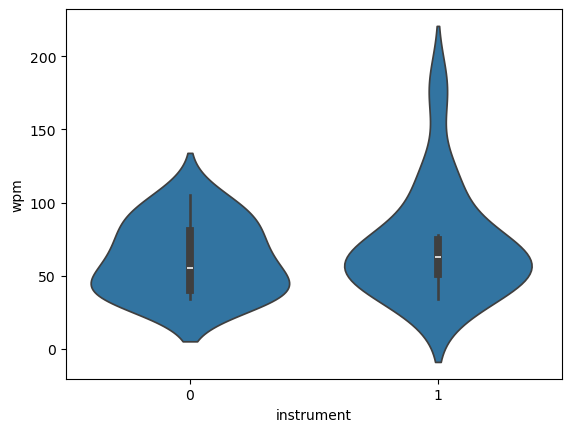

In [71]:
sns.violinplot(x="instrument", y="wpm", data=df)

<Axes: xlabel='coding', ylabel='wpm'>

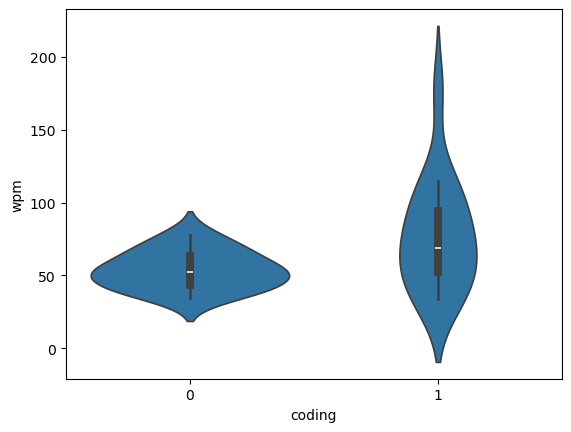

In [72]:
sns.violinplot(x="coding", y="wpm", data=df)

<Axes: xlabel='game', ylabel='wpm'>

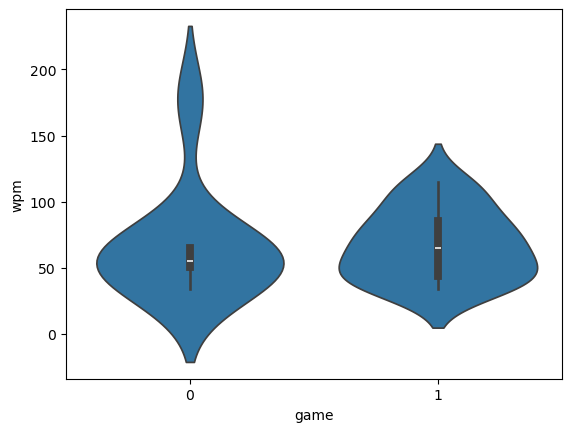

In [73]:
sns.violinplot(x="game", y="wpm", data=df)

<Axes: xlabel='macos', ylabel='wpm'>

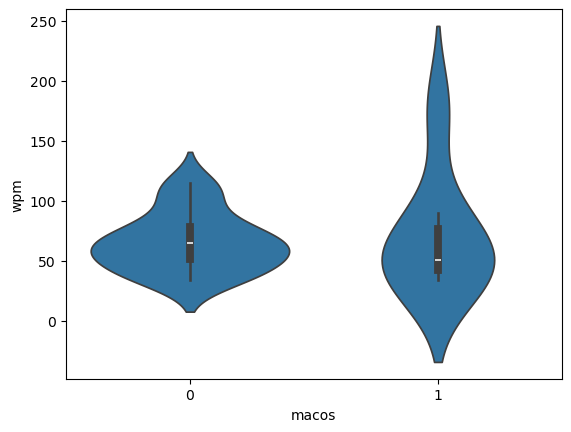

In [74]:
sns.violinplot(x="macos", y="wpm", data=df)

<Axes: xlabel='windows', ylabel='wpm'>

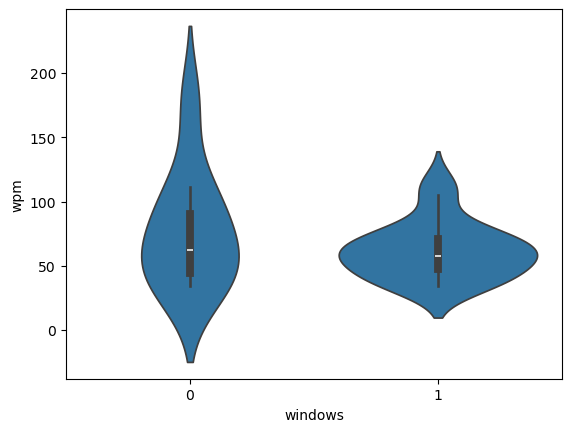

In [75]:
sns.violinplot(x="windows", y="wpm", data=df)